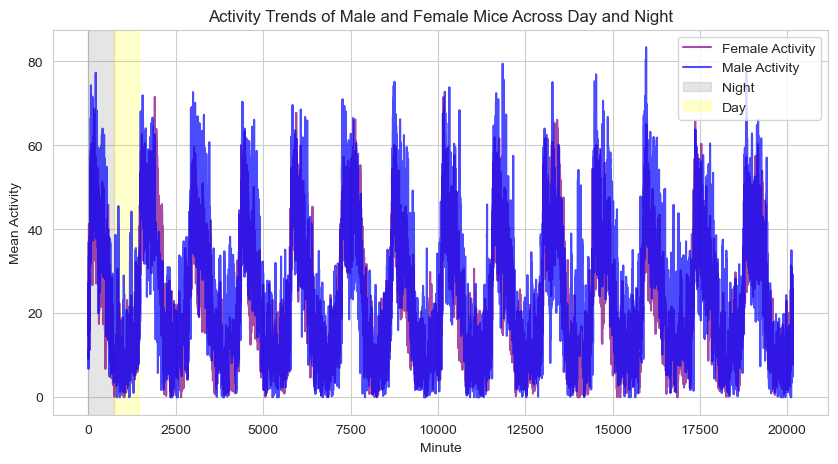

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load activity data
fem_act = pd.read_csv('FemAct.csv')
mal_act = pd.read_csv('MaleAct.csv')

# Melt data into long format
fem_act = fem_act.melt(var_name="Mouse", value_name="Activity")
mal_act = mal_act.melt(var_name="Mouse", value_name="Activity")

# Add Minute, Day, and Time_of_Day columns
fem_act["Minute"] = np.tile(np.arange(1440 * 14), len(fem_act["Mouse"].unique()))
fem_act["Day"] = fem_act["Minute"] // 1440
fem_act["Time_of_Day"] = fem_act["Minute"] % 1440  # Get minute within each day

mal_act["Minute"] = fem_act["Minute"]
mal_act["Day"] = fem_act["Day"]
mal_act["Time_of_Day"] = fem_act["Time_of_Day"]

# Define Night (Lights Off: 0-720 min) and Day (Lights On: 720-1440 min)
fem_act["Period"] = np.where(fem_act["Time_of_Day"] < 720, "Night", "Day")
mal_act["Period"] = fem_act["Period"]

# Aggregate activity over time by minute and period
fem_summary = fem_act.groupby(["Minute", "Period"])["Activity"].mean().reset_index()
mal_summary = mal_act.groupby(["Minute", "Period"])["Activity"].mean().reset_index()

# Plot activity trends for male and female mice
plt.figure(figsize=(10, 5))

plt.plot(fem_summary["Minute"], fem_summary["Activity"], label="Female Activity", color='purple', alpha=0.7)
plt.plot(mal_summary["Minute"], mal_summary["Activity"], label="Male Activity", color='blue', alpha=0.7)

# Highlight Night and Day Periods
plt.axvspan(0, 720, color='gray', alpha=0.2, label="Night")
plt.axvspan(720, 1440, color='yellow', alpha=0.2, label="Day")

plt.xlabel("Minute")
plt.ylabel("Mean Activity")
plt.title("Activity Trends of Male and Female Mice Across Day and Night")
plt.legend()
plt.grid(True)

plt.show()



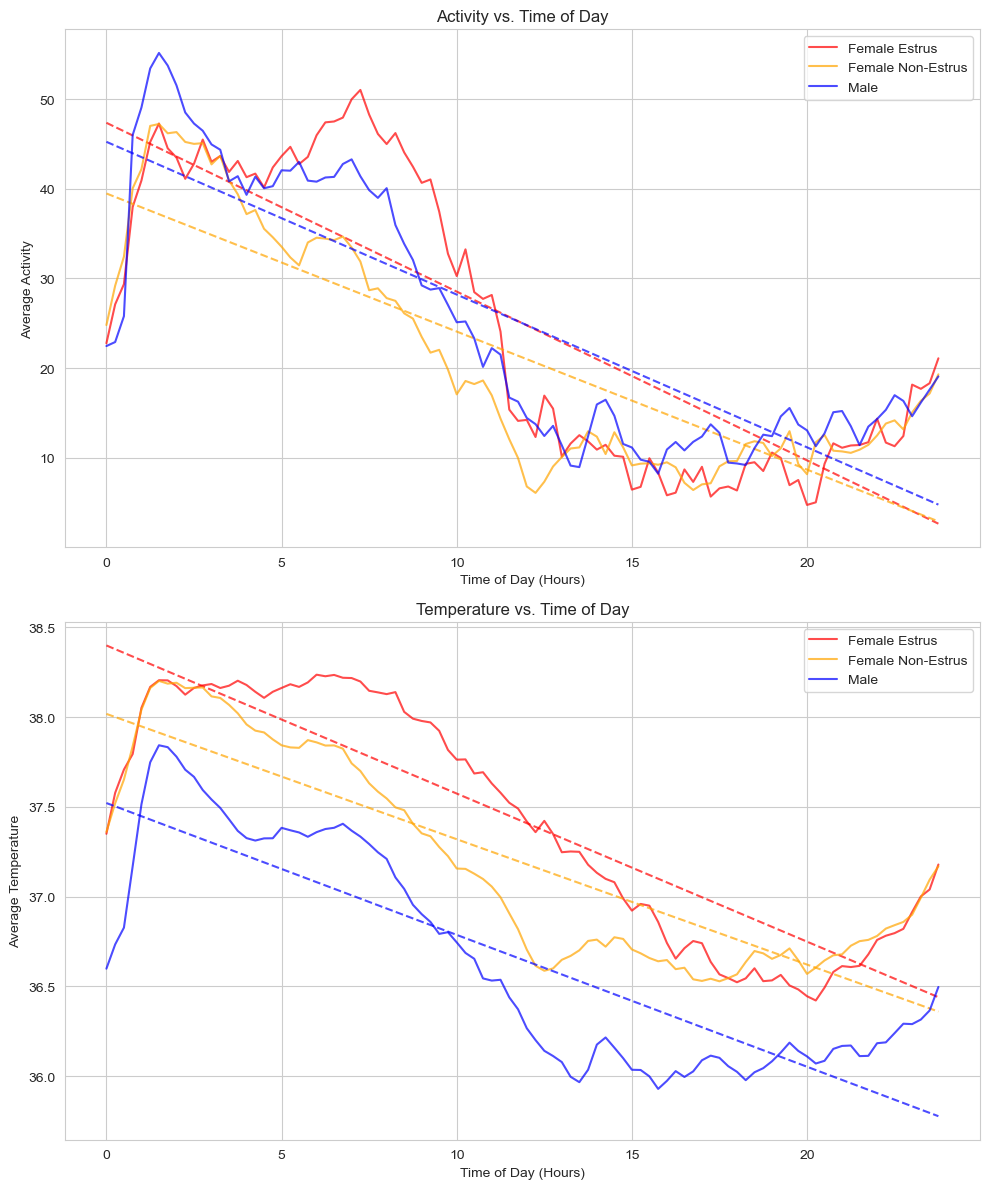

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load the data
fem_act_estr = pd.read_csv('AvgFemActEst.csv')
fem_act_non_estr = pd.read_csv('AvgFemActNonEst.csv')
fem_temp_estr = pd.read_csv('AvgFemTempEst.csv')
fem_temp_non_estr = pd.read_csv('AvgFemTempNonEst.csv')
male_act = pd.read_csv('AvgMaleActEst.csv')
male_temp = pd.read_csv('AvgMaleTempEst.csv')

# Set up the plot style
sns.set_style("whitegrid")

# Function to plot with trendlines
def plot_with_trend(ax, df, label, color):
    ax.plot(df['hour'], df['avg_value'], label=label, color=color, alpha=0.7)
    
    # Fit trendline
    slope, intercept, _, _, _ = linregress(df['hour'], df['avg_value'])
    trendline = slope * df['hour'] + intercept
    ax.plot(df['hour'], trendline, linestyle='dashed', color=color, alpha=0.7)

# Create the figure
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Activity Plot
plot_with_trend(axes[0], fem_act_estr, 'Female Estrus', 'red')
plot_with_trend(axes[0], fem_act_non_estr, 'Female Non-Estrus', 'orange')
plot_with_trend(axes[0], male_act, 'Male', 'blue')
axes[0].set_title('Activity vs. Time of Day')
axes[0].set_xlabel('Time of Day (Hours)')
axes[0].set_ylabel('Average Activity')
axes[0].legend()

# Temperature Plot
plot_with_trend(axes[1], fem_temp_estr, 'Female Estrus', 'red')
plot_with_trend(axes[1], fem_temp_non_estr, 'Female Non-Estrus', 'orange')
plot_with_trend(axes[1], male_temp, 'Male', 'blue')
axes[1].set_title('Temperature vs. Time of Day')
axes[1].set_xlabel('Time of Day (Hours)')
axes[1].set_ylabel('Average Temperature')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()
